# Assignment 3
### Due 9/23. Do four of five.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import seaborn as sns

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [84]:
nhanes = pd.read_csv('./data/nhanes_data_17_18.csv', low_memory=False)

nhanes['sleeping_na'] = nhanes['TroubleSleepingOrSleepingTooMuch'].isna()
nhanes['sleeping_na'].value_counts() 

sleeping_na
False    5086
True     3280
Name: count, dtype: int64

In [85]:
nhanes['concentrating_na'] = nhanes['TroubleConcentratingOnThings'].isna()
nhanes['concentrating_na'].value_counts() 

concentrating_na
False    5086
True     3280
Name: count, dtype: int64

In [86]:
pd.crosstab(nhanes['TroubleSleepingOrSleepingTooMuch'], nhanes['TroubleConcentratingOnThings'], normalize='columns') # Normalized to proportions

TroubleConcentratingOnThings,0.0,1.0,2.0,3.0
TroubleSleepingOrSleepingTooMuch,,,,
0.0,0.679406,0.317215,0.230769,0.220930
1.0,0.204293,0.408124,0.205128,0.186047
2.0,0.054730,0.150870,0.282051,0.168605
3.0,0.061571,0.123791,0.282051,0.424419


When respondents reported no trouble sleeping (0.0), about 68% also reported no trouble concentrating, while only 22% of those with severe concentration trouble (3.0) reported no trouble sleeping. Among those with mild sleeping problems (1.0), 20% reported no concentration issues, whereas 41% reported mild concentration trouble. For respondents with moderate sleeping problems (2.0), concentration issues appear relatively evenly distributed across levels. In contrast, people with severe sleeping problems (3.0) were much more likely to report severe concentration problems, with 42% reporting 3.0 compared to only 22% reporting 0.0. Overall, there is a clear positive association between sleep and concentration difficulties: the more severe the reported sleep problems, the more likely respondents are to also report serious concentration problems.

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

In [87]:
nhanes['diet_na'] = nhanes['HowHealthyIsTheDiet'].isna()
nhanes['diet_na'].value_counts() 

diet_na
False    5826
True     2540
Name: count, dtype: int64

In [88]:
nhanes['bmi_na'] = nhanes['BodyMassIndexKgm2'].isna()
nhanes['bmi_na'].value_counts() 

bmi_na
False    8005
True      361
Name: count, dtype: int64

In [89]:
nhanes.groupby('HowHealthyIsTheDiet')['BodyMassIndexKgm2'].describe()

,count,mean,std,min,25%,50%,75%,max
HowHealthyIsTheDiet,,,,,,,,
Excellent,423.0,26.587470,5.630916,15.3,22.8,25.8,29.45,56.3
Fair,1533.0,31.060013,7.911096,14.2,25.5,29.9,35.70,84.4
Good,2245.0,29.515635,7.423034,14.8,24.4,28.3,33.20,74.8
Poor,387.0,32.339535,8.869074,15.5,26.0,31.9,36.90,86.2
Very good,1138.0,27.302373,5.924146,13.2,23.2,26.4,30.30,64.2


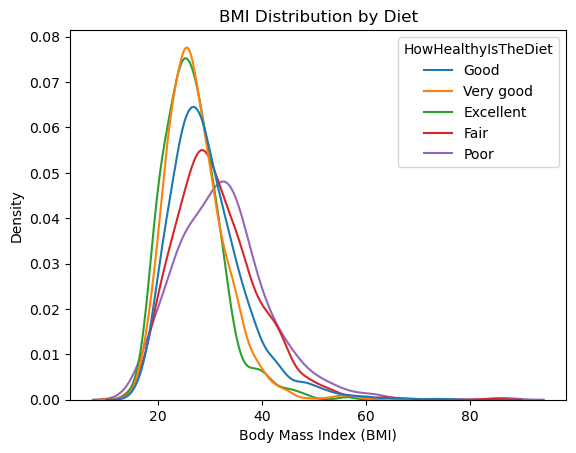

In [90]:
sns.kdeplot(
    data=nhanes, 
    x='BodyMassIndexKgm2', 
    hue='HowHealthyIsTheDiet', 
    common_norm=False
)
plt.title("BMI Distribution by Diet")
plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Density")
plt.show()

People with "excellent" and "very good" diets have relatively similar BMI distributions. Their curves are tall and narrow, indicating that most people in these groups cluster around the middle BMI values, with relatively low variability. The mean BMI for "excellent" is 26.6 (std =5.63) and for "very good" it's 27.3 (std = 5.92), showing very minimal differences. People with "good" and "fair" diets have slightly higher peak BMIs and wider distributions, showing more variability. The mean BMI for "good" is 29.5 (std = 7.42) and for "fair" it's 31.1 (std = 7.91). Their spreads from the 25th to 75th percentile are also larger than the "excellent" and "very good" groups, indicating more diversity in BMI values. The "poor" diet group has the highest mean BMI (32.5, std = 8.87) and the widest spread, showing this group has both the highest BMI on average and the most variability. The curve in the graph for this group is flatter and wider which captures the greater range of BMIs. 

Thus, as BMI increases, the reported diet quality decreases. The variability in BMI also rises. 

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

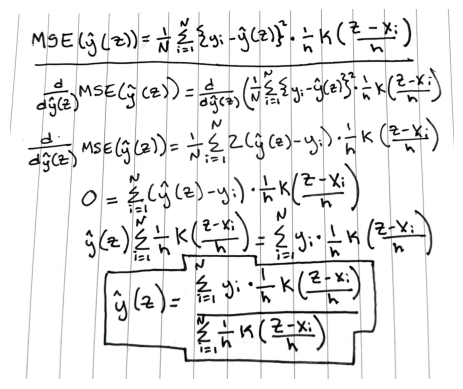

In [39]:
image = mping.imread('q3assignment3.jpeg')
plt.imshow(image)
plt.axis('off')
plt.show()

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

In [80]:
class LCLS_NW:
    def __init__(self, x, y, h=None, plot=True, x_label='X', y_label='Y', title = 'LCLS / NW Regression'):
        self.x = np.asarray(x) # predictor; np.asarray makes indexing and math easier
        self.y = np.asarray(y) # response
        self.n = len(self.x) # number of observations
        self.x_label = x_label 
        self.y_label = y_label
        self.title = title
        self.grid = np.sort(np.unique(self.x)) # sorted unique values of x; gives the distinct points on x-axis to estimate on
        self.y_hat = None # placeholder for estimated regression function values
        self.h = h # kernel bandwidth; will be computed if not provided
        if h is None:
            self.h = self.silverman()
    
    def silverman(self):
        iqr = np.quantile(self.x, 0.75) - np.quantile(self.x, 0.25) #computes interquartile range
        x_std = np.std(self.x) # standard deviation
        return 0.9 * min(x_std, iqr / 1.34) * self.n ** (-1 / 5) # combines iqr or std (uses smaller of the two), sample size, and exponent -1/5 which comes from kernel density theory
        # as the sample size grows, the bandwidth descreases to allow for the capturing of more details

    def fit(self): # goal is to estimate m(x) = E[Y|X=x] at each grid point
        diff = self.x[:,None] - self.grid[None,:] # computes difference between every data point in x and every grid point
        K = np.exp(-0.5 * (diff / self.h) ** 2) / (np.sqrt(2 * np.pi) * self.h) # each difference is scaled by bandwith and put into gaussian kernal formula
        num = (self.y[:,None] * K).sum(axis = 0) # weighted sum of responses y_i using kernel weights
        denom = K.sum(axis = 0) # sum of kernel weights
        self.y_hat = num / denom # nadaraya-watson estimate
        return self.y_hat, self.grid    
    
    def plot(self, alpha = 0.4):
        if self.y_hat is None:
            self.fit()
        
        plt.scatter(self.x, self.y, alpha=alpha)
        plt.plot(self.grid, self.y_hat, color='orange', linewidth=2)
        plt.xlabel(self.x_label)
        plt.ylabel(self.y_label)
        plt.title(self.title)
        plt.show()


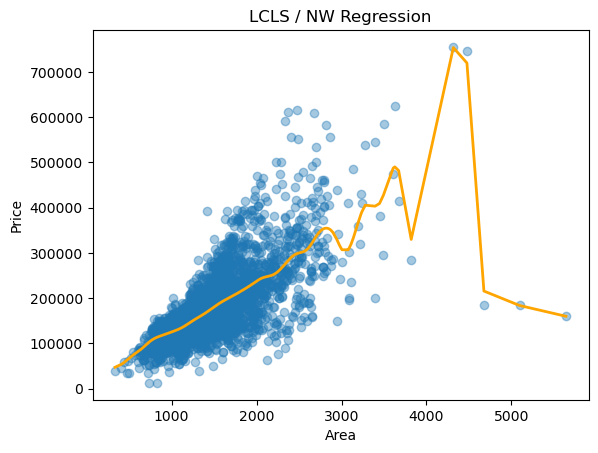

In [81]:
df = pd.read_csv('./data/ames_prices.csv', low_memory=False)
df = df.dropna(subset=['area', 'price'])

x = df['area']
y = df['price']

model = LCLS_NW(x, y, x_label='Area', y_label='Price')
model.fit()
model.plot()


5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome

Looking at the scatterplot of house area versus sale price, there seems to be a strong positive association where larger houses tend to sell for higher prices. This pattern is confirmed by the estimated CEF, computed using the LCLS/Nadaraya-Watson method, which shows a smooth upward trend.

But I think this relationship is unlikely to be strictly causal. There are several potential confounding factors that could jointly influence both area and price. For example, larger homes may be more likely to be located in more desirable neighborhoods or come with high-end features like pools, guest house, or patios that increase both area and price, but are not captured directly in the area variable. These variables present threats to causal identification, meaning we can't conclude that simply increasing a home's area would cause its price to increase by the amount predicted by the model.

I still think the model is valuable for predictive purposes. Even if the relationship between area and price isn't causal, the CEF still gives us the expected sale price conditional on the observed area. As long as we are not intervening (e.g., artificially changing a home’s area in hopes of raising its value), the model can be reliably used to predict the likely price of a house based on its size in a given market.